#### Purity 

In [69]:
old = 0 
old_tried = 0 
experiment = 'bandits_24_10_2'
new_tried = []
new = []
regret = []
i = 99
phi = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'phi'+str(i)+'.txt'))
phi_UCB = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'phi_UCB'+str(i)+'.txt'))
print(phi)
print(adj_matrix)

within_cluster = 0 
outside_cluster = 0 
for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix)):
        if adj_matrix[i,j]==1: 
            within_cluster += phi[i,j]
        else: 
            outside_cluster += phi[i,j]
            
# Total purity
print(within_cluster)
print(outside_cluster)            

within_cluster = 0 
outside_cluster = 0 
for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix)):
        if adj_matrix[i,j]==1:
            within_cluster += phi_UCB[i,j]
        else: 
            outside_cluster += phi_UCB[i,j]
print(within_cluster)
print(outside_cluster)            

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0. 10. ... 34.  0.  1.]
 [ 0.  2.  0. ...  2.  0.  1.]
 ...
 [ 0. 45.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 0. 1.]
 ...
 [0. 1. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]]
19752.0
269.0
48506.0
51494.0


In [77]:
#print(instance.sample_array)
dict_partition = {}
classes = {'[0 1]' :0, '[0 2]':1, '[0 3]' :2,'[1 2]' :3,'[1 3]':4,'[2 3]' :5,'[1 0]' :0, '[2 0]':1, '[3 0]' :2,'[2 1]' :3,'[3 1]':4,'[3 2]' :5
          }
classes = {'[0 1]' :'g', '[0 2]':'b', '[0 3]' :'y','[1 2]' :'r','[1 3]':'c','[2 3]' :'m','[1 0]' :'g', '[2 0]':'b', '[3 0]' :'y','[2 1]' :'r','[3 1]':'c','[3 2]' :'m'
          }

for idx,i in enumerate(instance.sample_array):
    dict_partition[idx] = classes[str(i)]
print(dict_partition)

{0: 'r', 1: 'g', 2: 'g', 3: 'c', 4: 'y', 5: 'g', 6: 'g', 7: 'm', 8: 'b', 9: 'c', 10: 'r', 11: 'g', 12: 'y', 13: 'b', 14: 'g', 15: 'c', 16: 'b', 17: 'c', 18: 'm', 19: 'c', 20: 'r', 21: 'c', 22: 'b', 23: 'm', 24: 'y', 25: 'b', 26: 'm', 27: 'm', 28: 'c', 29: 'm', 30: 'm', 31: 'm', 32: 'g', 33: 'r', 34: 'c', 35: 'c', 36: 'b', 37: 'm', 38: 'y', 39: 'c', 40: 'm', 41: 'g', 42: 'g', 43: 'm', 44: 'g', 45: 'g', 46: 'r', 47: 'c', 48: 'm', 49: 'r', 50: 'm', 51: 'g', 52: 'r', 53: 'c', 54: 'g', 55: 'm', 56: 'r', 57: 'c', 58: 'r', 59: 'b', 60: 'r', 61: 'y', 62: 'r', 63: 'g', 64: 'b', 65: 'y', 66: 'g', 67: 'g', 68: 'c', 69: 'b', 70: 'c', 71: 'b', 72: 'g', 73: 'm', 74: 'r', 75: 'm', 76: 'r', 77: 'r', 78: 'y', 79: 'g', 80: 'c', 81: 'y', 82: 'b', 83: 'm', 84: 'r', 85: 'y', 86: 'g', 87: 'y', 88: 'b', 89: 'c', 90: 'm', 91: 'r', 92: 'y', 93: 'g', 94: 'm', 95: 'y', 96: 'b', 97: 'g', 98: 'b', 99: 'g'}


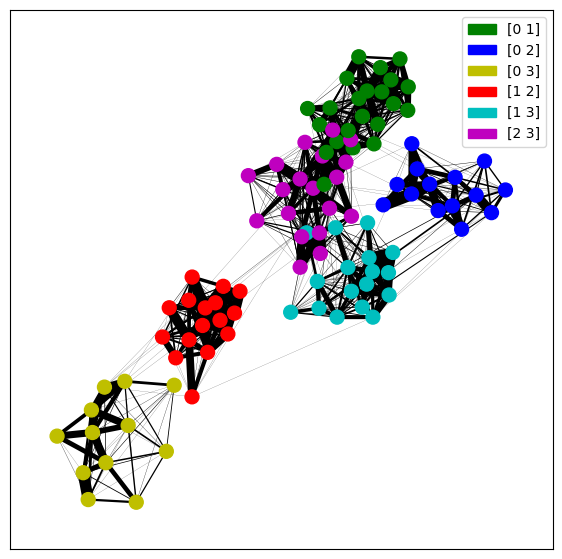

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

#print(phi)
phi_binary =np.array(np.array(phi,dtype='bool'),dtype='int')
#print(phi_binary)
phi_graph = nx.from_numpy_matrix(phi/10)

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def test(g):
# to install networkx 2.0 compatible version of python-louvain use:
    # pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2
    from community import community_louvain

    #g = nx.karate_club_graph()
    #partition = community_louvain.best_partition(g)
    #print(partition)
    pos = community_layout(g, dict_partition)

    #nx.draw(g, pos, node_color=list(dict_partition.values())); plt.show()
    import matplotlib.patches as mpatches 
    
    nodelist = g.nodes()
    widths = nx.get_edge_attributes(g,'weight')
    
    plt.figure(figsize=(7,7))
    nx.draw_networkx_nodes(g,pos,nodelist=nodelist,node_size=100,
                          node_color=list(dict_partition.values()))
    nx.draw_networkx_edges(g,pos,edgelist=widths.keys(),width=list(widths.values()),edge_color='k')
    g_patch = mpatches.Patch(color='g',label='[0 1]')
    b_patch = mpatches.Patch(color='b',label='[0 2]')
    y_patch = mpatches.Patch(color='y',label='[0 3]')
    r_patch = mpatches.Patch(color='r',label='[1 2]')
    c_patch = mpatches.Patch(color='c',label='[1 3]')
    m_patch = mpatches.Patch(color='m',label='[2 3]')
    
    plt.legend(handles=[g_patch,b_patch,y_patch,r_patch,c_patch,m_patch])
    plt.savefig(os.path.join('checkpoints_bandits',experiment,'graph.pdf'))
    plt.show()
    
    return

test(phi_graph)

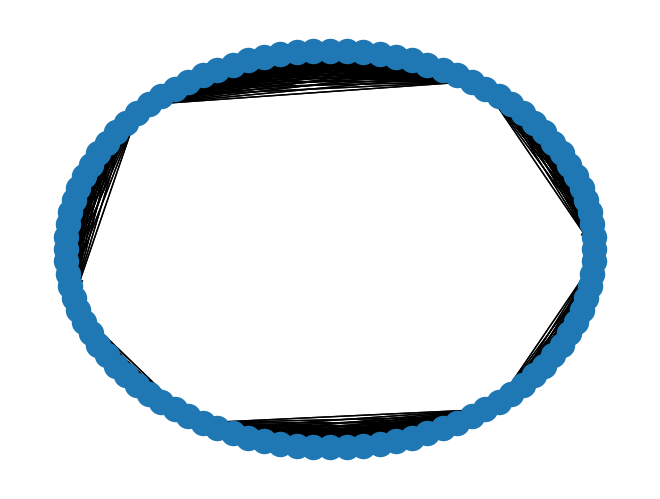

In [61]:
def graph_from_adj(arr):
    G = nx.DiGraph()

    for i in range(len(arr)):
        for j in range(len(arr)):
            if arr[i,j] == 1: 
                G.add_edge(i,j)
    return G 


GT = graph_from_adj(adj_matrix)
position = nx.circular_layout(GT)
nx.draw(GT,pos=position)

#### Regret rate

Text(0, 0.5, 'sum of communications in epoch')

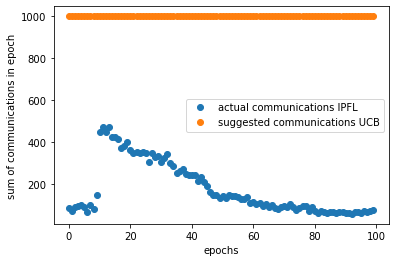

In [197]:
old = 0 
old_tried = 0 
experiment = 'MNIST_bandits_zeta'
new_tried = []
new = []
regret = []
for i in range(100): 
    phi = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'phi'+str(i)+'.txt'))
    phi_tried = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'phi_UCB'+str(i)+'.txt'))
    new.append(np.sum(phi) - old)
    old = np.sum(phi)
    new_tried.append(np.sum(phi_tried) - old_tried)
    old_tried = np.sum(phi_tried)
    regret.append(1-new[i]/new_tried[i])
    
    
    
plt.plot(new,'o',label='actual communications IPFL');
plt.plot(new_tried,'o',label='suggested communications UCB')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('sum of communications in epoch')

Text(0, 0.5, 'sum of communications in epoch')

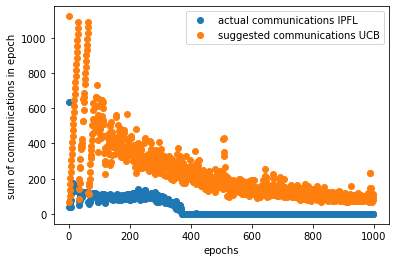

In [158]:
old = 0 
old_tried = 0 
experiment = 'MIT_BIH_bandits_1000'
new_tried = []
new = []
regret = []
for i in range(1000): 
    phi = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'phi'+str(i)+'.txt'))
    phi_tried = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'phi_UCB'+str(i)+'.txt'))
    new.append(np.sum(phi) - old)
    old = np.sum(phi)
    new_tried.append(np.sum(phi_tried) - old_tried)
    old_tried = np.sum(phi_tried)
    regret.append(1-new[i]/new_tried[i])
    
    
    
plt.plot(new,'o',label='actual communications IPFL');
plt.plot(new_tried,'o',label='suggested communications UCB')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('sum of communications in epoch')
#

Text(0, 0.5, 'regret')

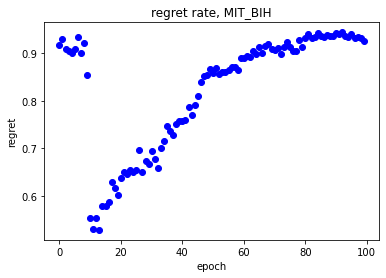

In [198]:
plt.plot(regret,'bo')
plt.title('regret rate, MIT_BIH')
plt.xlabel('epoch')
plt.ylabel('regret')

Text(0, 0.5, 'accuracy (%)')

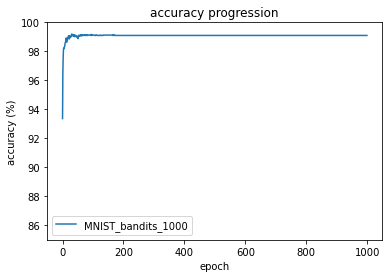

In [122]:
ax = plt.gca()
experiments = ['MNIST_bandits_1000'] #,'MIT_BIH_federated','MIT_BIH_local','MIT_BIH_AFPL']
for experiment in experiments: 
    accuracies = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'accuracies.txt'))
    #print(accuracies)
    plt.plot(accuracies,label=experiment);
plt.legend()
ax.set_ylim([85,100])
ax.set_title('accuracy progression')
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy (%)')

Text(0, 0.5, 'accuracy (%)')

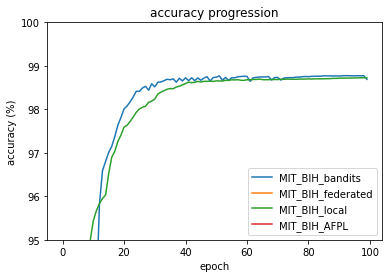

In [130]:
ax = plt.gca()
experiments = ['MIT_BIH_bandits','MIT_BIH_federated','MIT_BIH_local','MIT_BIH_AFPL']
for experiment in experiments: 
    accuracies = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'accuracies.txt'))
    plt.plot(accuracies,label=experiment);
plt.legend(loc=4)
ax.set_ylim([95,100])
ax.set_title('accuracy progression')
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy (%)')

Text(0, 0.5, 'accuracy (%)')

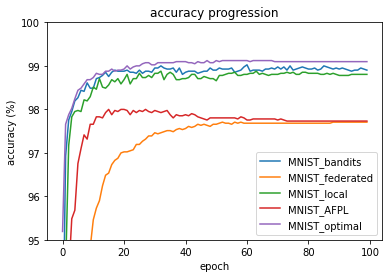

In [125]:
ax = plt.gca()
experiments = ['MNIST_bandits','MNIST_federated','MNIST_local','MNIST_AFPL','MNIST_optimal']
for experiment in experiments: 
    accuracies = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'accuracies.txt'))
    plt.plot(accuracies,label=experiment);
plt.legend()
ax.set_ylim([95,100])
ax.set_title('accuracy progression')
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy (%)')

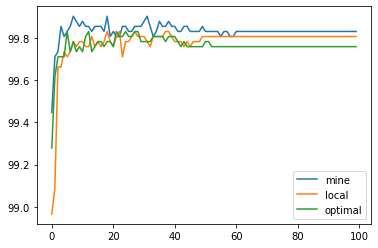

In [14]:
experiments = ['mine','local','optimal']
for experiment in experiments: 
    accuracies = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'accuracies.txt'))
    plt.plot(accuracies,label=experiment);
plt.legend()

(0.0, 0.1)

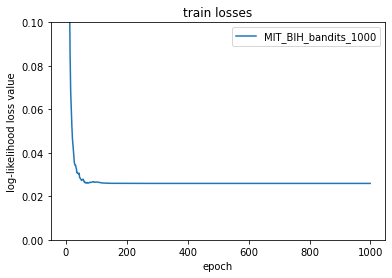

In [109]:
experiments = ['MIT_BIH_bandits','MNIST_federated','MNIST_local','MNIST_AFPL','MNIST_optimal']
ax = plt.gca()
for i,experiment in enumerate(experiments):
    loss_test = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'losses_test.txt'))
    plt.plot(loss_test,label=experiment);
    #loss_train = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'losses_train.txt'))
    #ax[i].plot(loss_train,label='loss_train');
    #ax[i].set_title(experiment)
#loss_test = np.loadtxt(os.path.join('checkpoints_bandits','local','losses_test.txt'))
#plt.plot(loss_test,label='local')
plt.legend()
plt.title('train losses')
ax.set_xlabel('epoch')
ax.set_ylabel('log-likelihood loss value')
ax.set_ylim([0, 0.1])

(0.0, 2.0)

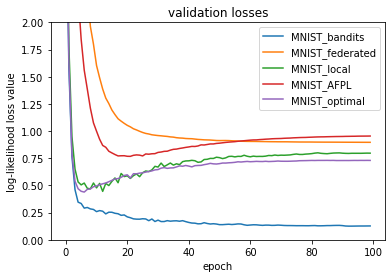

In [59]:
experiments = ['MNIST_bandits','MNIST_federated','MNIST_local','MNIST_AFPL','MNIST_optimal']
ax = plt.gca()
for i,experiment in enumerate(experiments):
    loss_test = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'losses_test.txt'))
    plt.plot(loss_test,label=experiment);
#loss_test = np.loadtxt(os.path.join('checkpoints_bandits','local','losses_train.txt'))
#plt.plot(loss_test,label='local')
plt.legend()
ax.set_xlabel('epoch')
ax.set_ylabel('log-likelihood loss value')
plt.title('validation losses')
ax.set_ylim([0, 2])

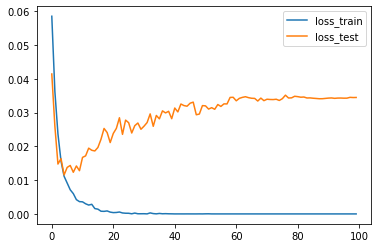

In [10]:
# load all numpy arrays of all experiments: 
# mine, FedAvg, local, AFPL, optimal 

experiment = 'local'
loss_test = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'losses_test.txt'))
plt.plot(loss_test,label='loss_train');
loss_train = np.loadtxt(os.path.join('checkpoints_bandits',experiment,'losses_train.txt'))
plt.plot(loss_train,label='loss_test');
plt.legend()


### Start of code 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from scipy.special import binom 

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torchvision import transforms
from torch.autograd import Variable
import torch.utils.data as data_utils
import torch.nn.init as init

from collections import Counter
import operator
import copy 
from itertools import product,combinations
from time import time 
#from IPython.core.display import display

%matplotlib inline

## code extracted from https://www.kaggle.com/code/graymant/breast-cancer-diagnosis-with-pytorch
## SV code extracted from https://github.com/mburaksayici/ExplainableAI-Pure-Numpy/blob/main/KernelSHAP-Pure-Numpy.ipynb

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import yaml
import os 
import shutil
def init():
    with open('settings/train_settings_bandits.yaml', 'r') as file:
        settings = yaml.safe_load(file)
    if not os.path.isdir('checkpoints_bandits'):
        os.mkdir('checkpoints_bandits')
    if not os.path.isdir(os.path.join('checkpoints_bandits', settings['experiment_name'])):
        os.mkdir(os.path.join('checkpoints_bandits', settings['experiment_name']))
    save_dir = os.path.join('checkpoints_bandits', settings['experiment_name'])
    if not os.path.isdir(os.path.join(save_dir, 'model')):
        os.mkdir(os.path.join(save_dir, 'model'))
    shutil.copyfile('settings/train_settings.yaml', save_dir + '/train_settings.yaml')
    return settings,save_dir

settings, save_dir = init()
print(save_dir)

checkpoints_bandits/test


In [203]:
from models import Net
from data import FEMNIST_dataset, Partition_MNIST_NIID
from data import MNIST_NIID_dataset
import tensorflow.keras as tk
#import yaml 
import random 

### Divide MNIST dataset over a total of 10 clients. Each client gets 2 classes.
train_data, test_data = tk.datasets.mnist.load_data()
#blub = np.random.randint(len(train_data[0]),size=10000)
#instance = Partition_MNIST_NIID(train_data[0][blub],train_data[1][blub])
instance = Partition_MNIST_NIID(train_data[0],train_data[1])
classes_per_user = 2 #settings['n_classes_per_user']
total_clients = settings['n_clients']
total_clients = 100
n_classes_total = 4 #settings['n_classes_total']
train_partition = instance.create_partition(n_classes_total,classes_per_user,total_clients)
test_instance = Partition_MNIST_NIID(test_data[0], test_data[1])
test_partition = test_instance.create_partition_test(instance.sample_array)

[[1 2]
 [0 1]
 [0 1]
 [3 1]
 [3 0]
 [0 1]
 [0 1]
 [3 2]
 [0 2]
 [3 1]
 [1 2]
 [0 1]
 [0 3]
 [0 2]
 [0 1]
 [1 3]
 [0 2]
 [1 3]
 [3 2]
 [1 3]
 [1 2]
 [1 3]
 [2 0]
 [3 2]
 [0 3]
 [2 0]
 [2 3]
 [3 2]
 [1 3]
 [2 3]
 [3 2]
 [3 2]
 [0 1]
 [1 2]
 [3 1]
 [1 3]
 [2 0]
 [3 2]
 [0 3]
 [3 1]
 [3 2]
 [0 1]
 [0 1]
 [3 2]
 [1 0]
 [1 0]
 [1 2]
 [1 3]
 [2 3]
 [2 1]
 [2 3]
 [0 1]
 [1 2]
 [1 3]
 [0 1]
 [2 3]
 [1 2]
 [3 1]
 [2 1]
 [2 0]
 [2 1]
 [0 3]
 [1 2]
 [1 0]
 [2 0]
 [0 3]
 [0 1]
 [0 1]
 [1 3]
 [0 2]
 [1 3]
 [2 0]
 [1 0]
 [2 3]
 [1 2]
 [2 3]
 [2 1]
 [2 1]
 [3 0]
 [0 1]
 [3 1]
 [3 0]
 [2 0]
 [2 3]
 [1 2]
 [3 0]
 [1 0]
 [3 0]
 [0 2]
 [1 3]
 [3 2]
 [1 2]
 [3 0]
 [0 1]
 [2 3]
 [3 0]
 [2 0]
 [1 0]
 [2 0]
 [0 1]]


In [142]:
# split train dataset into train and val 
print([len(x) for x in train_partition.values()])
fraction = 0.8 
#print([int(np.floor(len(x)*0.8)) for x in train_partition.values()])
train_length = [int(np.floor(len(x)*0.8)) for x in train_partition.values()]

train_partition2 = {}
val_partition = {}

for key in train_partition.keys():
    og_length = len(train_partition[key])
    og_samples = np.array(train_partition[key])
    list1 = [x for x in range(og_length)]
    train_samples = np.random.choice(list1,size=int(np.floor(og_length*fraction)),replace=False)
    val_samples = [x for x in range(og_length) if x not in train_samples]
    train_partition2[key] = og_samples[train_samples]
    val_partition[key] = og_samples[val_samples]
print([len(x) for x in train_partition2.values()])
print([len(x) for x in val_partition.values()])

[2948, 1950, 1950, 2495, 2519, 1950, 1950, 3517, 2972, 2495]
[2358, 1560, 1560, 1996, 2015, 1560, 1560, 2813, 2377, 1996]
[590, 390, 390, 499, 504, 390, 390, 704, 595, 499]


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 0. 1.]
 ...
 [0. 1. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]]


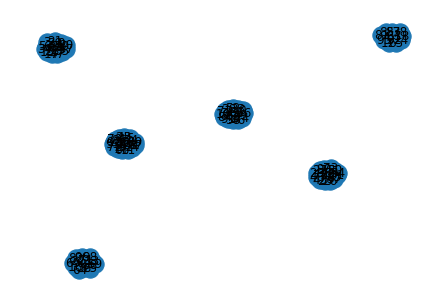

In [204]:
# who do we expect to collaborate based on labels? 
import networkx as nx 
def Repeat(x):
    _size = len(x)
    repeated = []
    cit = {}
    for i in range(_size):
        k = i + 1 
        key = str(np.sort(x[i,:]))
        if key not in cit: 
            cit[key] = [i]
            
        for j in range(k, _size):
            if x[i,0] == x[j,0] and x[i,1] == x[j,1]: #and x[i,:] not in repeated:
                repeated.append(x[i,:])
                if j not in cit[key]: 
                    cit[key].append(j)
            if x[i,0] == x[j,1] and x[i,1] == x[j,0]: #and x[i,:] and x[j,:] not in repeated:
                repeated.append(x[i,:])
                if j not in cit[key]:
                    cit[key].append(j)
                
    return cit 

cit = Repeat(instance.sample_array)
GS = nx.DiGraph()
adj_matrix = np.zeros((total_clients,total_clients))
for p in cit.keys():
    arr = cit[p] 
    for i in arr:
        for j in arr:
            if i != j: 
                GS.add_edge(i,j)
                adj_matrix[i,j] += 1 
nx.draw(GS,with_labels=True)
print(adj_matrix)
                

In [144]:
# find the highest possible degree of the cluster 
print(np.max(np.sum(adj_matrix,axis=1)))

3.0


In [151]:
class P2P_AFPL():
    def __init__(self,total_clients,train_data,train_partition,val_partition,test_data,test_partition,n_clients_selected,test='AFPL'): 
        self.network = Net('MNIST_niid')
        self.total_clients = total_clients 
        self.client_models = {}
        self.optimizers = {}
        self.dataloaders = {}
        self.len = {}
        self.len_test = {}
        self.dataloaders_test = {}
        self.best_test_loss = {}
        self.best_test_loss_global = 1000000 
        self.current_test_loss = {}
        self.current_train_loss = {}
        self.test = test 
        self.n_clients_selected = n_clients_selected 
        if self.test == 'AFPL':
            self.client_models_global = {}
            
        if self.test == 'bandits': 
            self.comb_UCB = combinatorial_UCB(self.total_clients,self.n_clients_selected)
            
        for i in range(total_clients):
            self.client_models[str(i)] = copy.deepcopy(self.network).double().cuda()
            self.optimizers[str(i)] = torch.optim.SGD(self.client_models[str(i)].parameters(),lr=0.008,momentum=0.5)
            dataset_train= MNIST_NIID_dataset(train_data[0],train_data[1],train_partition,i)
            self.len[str(i)]= len(dataset_train)
            self.dataloaders[str(i)] = DataLoader(dataset_train,batch_size=16,shuffle=True)
            dataset_test= MNIST_NIID_dataset(train_data[0],train_data[1],val_partition,i)#MNIST_NIID_dataset(test_data[0],test_data[1],test_partition,i)
            self.len_test[str(i)] = len(dataset_test)
            self.dataloaders_test[str(i)] = DataLoader(dataset_test,batch_size=16,shuffle=False)
            self.best_test_loss[str(i)] = 10000000 
            self.current_test_loss[str(i)] = 100000 
            self.current_train_loss[str(i)] = 1000000 
            if self.test == 'AFPL':
                self.client_models_global[str(i)] = copy.deepcopy(self.network).double().cuda()
                self.shared_model = copy.deepcopy(self.network).double().cuda()
        self.dataset_train = dataset_train 
        
    def update_local_models(self,selected_clients):
        self.dw = {}
        loss_test = 0 
        loss_test2 = 0 
        losses = 0 
        losses2 = 0 
        loss_test3 = 0 
        losses3 = 0 
        
        for idx,i in enumerate(selected_clients): 
            
            dataloader = self.dataloaders[str(i)]
            optimizer= torch.optim.Adam(self.client_models[str(i)].parameters(),lr=0.001*0.95**self.iteration)
            self.client_models[str(i)].train()
            
            if self.test == 'AFPL':
                self.client_models_global[str(i)] = copy.deepcopy(self.shared_model)
                self.client_models_global[str(i)].train()
                optimizer_global = torch.optim.Adam(self.client_models_global[str(i)].parameters(),lr=0.001*0.95**self.iteration)
            
            for batch_idx, (data, target) in enumerate(dataloader):
                data = data.double().cuda()
                target=target.long().cuda()

                optimizer.zero_grad()
                output = self.client_models[str(i)](data)
                loss = F.nll_loss(output,target)
                
                if self.test == 'AFPL': 
                    optimizer_global.zero_grad()
                    output_global= self.client_models_global[str(i)](data)
                    loss_global = F.nll_loss(output_global,target)
                    loss_global.backward()
                    optimizer_global.step()

                loss.backward()
                optimizer.step()
            
            self.client_models[str(i)].eval()
            dataloader_test = self.dataloaders_test[str(i)]
            loss_test = 0 
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(dataloader_test):
                    data = data.double().cuda()
                    target=target.long().cuda()

                    output = self.client_models[str(i)](data)
                    loss_test += F.nll_loss(output,target)
                self.current_test_loss[str(i)] = loss_test/self.len_test[str(i)]
                if self.current_test_loss[str(i)] < self.best_test_loss[str(i)]:
                    torch.save(self.client_models[str(i)].state_dict(), os.path.join(save_dir, 'model', 'best_model'+str(i)+'.pt'))
                    self.best_test_loss[str(i)] = self.current_test_loss[str(i)]
                    
            losses += loss_test /self.len_test[str(i)]
            loss_test2 = 0 
            self.client_models[str(i)].eval()
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(dataloader):
                    data = data.double().cuda()
                    target=target.long().cuda()

                    output = self.client_models[str(i)](data)
                    loss_test2 += F.nll_loss(output,target)

            losses2 += loss_test2/ self.len[str(i)]
            self.current_train_loss[str(i)] = loss_test2/self.len[str(i)]

        print('full train loss: ',losses2)
        print('full loss: ',losses)

        return losses2,losses
            
    def combine_models(self,i,client_numbers,set_as=True):
        zero_copy = copy.deepcopy(self.client_models[str(i)]) # This is used to collect the model in
        j =0
        client_numbers_plus_client = np.concatenate((client_numbers,np.array([int(i)])))# This is more efficient
      #  alphas = zero_copy.alphas.detach()
       # alphas[i] = 1 - torch.sum(
       #     torch.tensor([iii for idx, iii in enumerate(alphas) if idx != i and idx in client_numbers]))
        # It's not possible to set the value of self.alphas[i], so instead we determine it manually here
        alphas = torch.ones(len(client_numbers_plus_client)).cuda()/(len(client_numbers_plus_client))
        #print(alphas)
        for ii in client_numbers_plus_client:
          #  print(ii)
            for (name, param),(name2,param2) in zip(zero_copy.named_parameters(),self.client_models[str(ii)].named_parameters()): #self.client_models[str(ii)].named_parameters()):

                if name != 'alphas':
                    if j == 0:
                        param.data = torch.zeros(param.shape).cuda()

                    param.data += alphas[j]*param2.data # we add all participating client's models to the one here.

            j += 1

        #self.client_models[str(i)] = zero_copy.double()
        if set_as == True: 
            for (name,param),(name2,param2) in zip(self.client_models[str(i)].named_parameters(),zero_copy.named_parameters()):
                param.data = param2.data 
            self.client_models[str(i)].double()
        else: 
            return zero_copy.double()
            
    def federated_averaging(self):
        self.shared_model = copy.deepcopy(self.network).double().cuda()
        n_clients = len(self.selected_clients)
        weight = [self.len[str(x)] for x in self.selected_clients]
        weight = weight / np.sum(weight)
        
        losses = 0 
        losses2 = 0 
        #print("weights ",weight)
        for idx,i in enumerate(self.selected_clients): 
            for (name, param),(name2,param2) in zip(self.shared_model.named_parameters()
                                                      ,self.client_models[str(i)].named_parameters()):
                if idx == 0: 
                    param.data = torch.zeros(param.shape).cuda().double()
                param.data += weight[idx]*param2.data 
                
        self.shared_model = self.shared_model.double().eval()
        
        for i in self.selected_clients: 
            self.client_models[str(i)] = copy.deepcopy(self.shared_model) #copy global model to the clients 
            loss_test = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(i)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test += F.nll_loss(self.shared_model(data),target).detach().cpu().numpy()

            loss_test = loss_test/self.len_test[str(i)]
            losses += loss_test
            if loss_test < self.best_test_loss[str(i)]:
                    torch.save(self.client_models[str(i)].state_dict(), os.path.join(save_dir, 'model', 'best_model'+str(i)+'.pt'))
                    self.best_test_loss[str(i)] = loss_test 
            self.client_models[str(i)].eval()
            loss_test2 = 0 
            for batch_idx, (data,target) in enumerate(self.dataloaders[str(i)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test2 += F.nll_loss(self.shared_model(data),target).detach().cpu().numpy()

            loss_test2 = loss_test2/self.len[str(i)]
            losses2 += loss_test2
            
        
        return losses, losses2
        
    def AFPL(self): #use alpha = 0.25 = 0.75 global model + 0.25 local model 
        self.shared_model_old = copy.deepcopy(self.shared_model)
        self.shared_model = copy.deepcopy(self.network).double().cuda()
        n_clients = len(self.selected_clients)
        weight = [self.len[str(x)] for x in self.selected_clients]
        weight = weight / np.sum(weight)
        
        losses = 0 
        losses2 = 0 
        
        #accumulate local weights 
        for idx,i in enumerate(self.selected_clients): 
            for (name, param),(name2,param2),(name3,param3),(name4,param4) in zip(self.shared_model.named_parameters()
                                                      ,self.client_models_global[str(i)].named_parameters(),
                                                                  self.shared_model_old.named_parameters(),
                                                        self.client_models[str(i)].named_parameters()):
                if idx == 0: 
                    param.data = torch.zeros(param.shape).cuda().double()
                param.data += weight[idx]*param2.data # accumulate local weights
                param4.data = 0.25*param4.data + 0.75*param3.data # do AFPL local model update: note that we take the previous global model
            self.client_models[str(i)] = self.client_models[str(i)].double()
            self.client_models[str(i)].eval()
            loss_test = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(i)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test += F.nll_loss(self.client_models[str(i)](data),target).detach().cpu().numpy()

            loss_test = loss_test/self.len_test[str(i)]
            losses += loss_test
            if loss_test < self.best_test_loss[str(i)]:
                    torch.save(self.client_models[str(i)].state_dict(), os.path.join(save_dir, 'model', 'best_model'+str(i)+'.pt'))
                    self.best_test_loss[str(i)] = loss_test 
            self.client_models[str(i)].eval()
            loss_test2 = 0 
            for batch_idx, (data,target) in enumerate(self.dataloaders[str(i)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test2 += F.nll_loss(self.client_models[str(i)](data),target).detach().cpu().numpy()

            loss_test2 = loss_test2/self.len[str(i)]
            losses2 += loss_test2
        
        self.shared_model = self.shared_model.double()
        return losses, losses2 
        
    def optimal_fedavg(self):
        losses = 0 
        losses2 = 0 
        for i in range(self.total_clients):

            self.client_models[str(i)].eval()
            dataloader_test = self.dataloaders_test[str(i)]
            loss_test = 0 
            loss_test2 = 0
            #print(np.where(adj_matrix[i,:]>0)[0])
            label_informed_selected_clients = np.where(adj_matrix[i,:]>0)[0]

            label_informed_shared_model = self.combine_models(i,label_informed_selected_clients,set_as=False)
            label_informed_shared_model.eval()
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(dataloader_test):
                    data = data.double().cuda()
                    target=target.long().cuda()

                    output2 = label_informed_shared_model(data)
             
                    loss_test += F.nll_loss(output2,target)
                if loss_test/self.len_test[str(i)] < self.best_test_loss[str(i)]:
                    torch.save(self.client_models[str(i)].state_dict(), os.path.join(save_dir, 'model', 'best_model'+str(i)+'.pt'))
                    self.best_test_loss[str(i)] = loss_test /self.len_test[str(i)]
            losses += loss_test /self.len_test[str(i)]
            
            dataloader_test = self.dataloaders[str(i)]
            loss_test2 = 0 
            with torch.no_grad():
                for batch_idx, (data, target) in enumerate(dataloader_test):
                    data = data.double().cuda()
                    target=target.long().cuda()

                    output = label_informed_shared_model(data)
                    loss_test2 += F.nll_loss(output,target)
            losses2 += loss_test2 /self.len[str(i)]

            self.combine_models(i,label_informed_selected_clients)
        return losses, losses2  
        
    def my_method(self,client):
        
        selected_clients = []
        other_clients = [x for x in range(self.total_clients) if x is not client]
        ey = np.zeros(len(other_clients)) # fix indices 
        current_test = np.zeros(len(other_clients))
        collected_clients = []
        list1 = np.arange(len(other_clients))
        np.random.shuffle(list1)
        for i in list1: 
            #selected_clients_coalition = other_clients[i] +[client]
            shared_model = self.combine_models(client,[other_clients[i]],set_as=False)
            
            if len(collected_clients)>0: 
                all_clients = collected_clients+[other_clients[i]]
                shared_model2 = self.combine_models(client,all_clients,set_as=False)
            
           # print(selected_clients_coalition)
            shared_model.eval().cuda()
            self.client_models[str(client)].eval().cuda()
            loss_test = 0
            loss_test2 = 0 
            loss_test3 = 0 
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test += F.nll_loss(shared_model(data),target).detach().cpu().numpy()
                loss_test2 += F.nll_loss(self.client_models[str(client)](data),target).detach().cpu().numpy()
                
                if len(collected_clients)>0: 
                    loss_test3 += F.nll_loss(shared_model2(data),target).detach().cpu().numpy()
                    
            ey[i] = loss_test/self.len_test[str(client)]
            current_test[i] = loss_test2/self.len_test[str(client)]
            if ey[i] < current_test[i]:
                if len(collected_clients)>0 : 
                    test2 = loss_test3 / self.len_test[str(client)]
                    if test2 < current_test[i]:
                        collected_clients.append(other_clients[i])
                else: 
                    collected_clients.append(other_clients[i])
        loss_test = current_test[i]
    
        selected_clients = np.where(ey<=self.current_test_loss[str(client)].detach().cpu().numpy() )[0]
        selected_clients = [other_clients[x] for x in selected_clients]
        selected_clients = collected_clients 
            
        if len(selected_clients) > 0 : 
            #self.client_models[str(client)] = copy.deepcopy(shared_model)
            self.combine_models(client,selected_clients,set_as=True)
            #self.client_models[str(client)].double().eval().cuda()
            loss_test = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test += F.nll_loss(self.client_models[str(client)](data),target).detach().cpu().numpy()
 
            loss_test = loss_test/self.len_test[str(client)]
            if loss_test < self.best_test_loss[str(client)]:
                    torch.save(self.client_models[str(client)].state_dict(), os.path.join(save_dir, 'model', 'best_model'+str(i)+'.pt'))
                    self.best_test_loss[str(client)] = loss_test 
            self.client_models[str(client)].eval()
            loss_test2 = 0 
            for batch_idx, (data,target) in enumerate(self.dataloaders[str(client)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test2 += F.nll_loss(self.client_models[str(client)](data),target).detach().cpu().numpy()
 
            loss_test2 = loss_test2/self.len[str(client)]
                
        #    print('test loss: ',loss_test)
        #return ey, selected_clients 
        return loss_test,loss_test2,selected_clients
  
    def calc_accuracy(self,test=True):
        accuracies = np.zeros(len(self.selected_clients))
        total = 0 
        for i in self.selected_clients: 
            if test == True: 
                dataloader = self.dataloaders_test[str(i)]
            else: 
                dataloader = self.dataloaders[str(i)]
            intermediate_accuracy = 0 

            for batch_idx, (data, target) in enumerate(dataloader):
                data = data.double().cuda()
                target = target.long().cuda()
                output = self.client_models[str(i)](data)
                output_array = output.detach().cpu().numpy()
                output_class = np.argmax(output_array,axis=-1)
                target_array = target.detach().cpu().numpy()
                intermediate_accuracy += np.sum(output_class == target_array)
            if test == True: 
                accuracy = intermediate_accuracy/self.len_test[str(i)]*100
                total += self.len_test[str(i)]
            else: 
                accuracy = intermediate_accuracy/self.len[str(i)]*100
                total += self.len[str(i)]
           # print(i)
           # print(accuracy)
            
            accuracies[i] = intermediate_accuracy 
        overall_accuracy = np.sum(accuracies)/total*100
        return overall_accuracy
    
    def my_method2(self,client,k=10):
        
        selected_clients = []
        other_clients = [x for x in range(self.total_clients) if x is not client]
        ey = np.zeros(len(other_clients)) # fix indices 
        current_test = np.zeros(len(other_clients))
        collected_clients = []
        list1 = np.arange(len(other_clients))
        np.random.shuffle(list1)
        for i in list1[:k]: 
            shared_model = self.combine_models(client,[other_clients[i]],set_as=False)
            
            if len(collected_clients)>0: 
                all_clients = collected_clients+[other_clients[i]]
                shared_model2 = self.combine_models(client,all_clients,set_as=False)

            shared_model.eval().cuda()
            self.client_models[str(client)].eval().cuda()
            loss_test = 0
            loss_test2 = 0 
            loss_test3 = 0 
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test += F.nll_loss(shared_model(data),target).detach().cpu().numpy()
                loss_test2 += F.nll_loss(self.client_models[str(client)](data),target).detach().cpu().numpy()
                
                if len(collected_clients)>0: 
                    loss_test3 += F.nll_loss(shared_model2(data),target).detach().cpu().numpy()
                    
            ey[i] = loss_test/self.len_test[str(client)]
            current_test[i] = loss_test2/self.len_test[str(client)]
            if ey[i] < current_test[i]:
                if len(collected_clients)>0 : 
                    test2 = loss_test3 / self.len_test[str(client)]
                    if test2 < current_test[i]:
                        collected_clients.append(other_clients[i])
                else: 
                    collected_clients.append(other_clients[i])
        loss_test = current_test[i]
    
        selected_clients = np.where(ey<=self.current_test_loss[str(client)].detach().cpu().numpy() )[0]
        selected_clients = [other_clients[x] for x in selected_clients]
        selected_clients = collected_clients 
            
        if len(selected_clients) > 0 : 
            self.combine_models(client,selected_clients,set_as=True)
            loss_test = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test += F.nll_loss(self.client_models[str(client)](data),target).detach().cpu().numpy()
 
            loss_test = loss_test/self.len_test[str(client)]
            if loss_test < self.best_test_loss[str(client)]:
                    torch.save(self.client_models[str(client)].state_dict(), os.path.join(save_dir, 'model', 'best_model'+str(i)+'.pt'))
                    self.best_test_loss[str(client)] = loss_test 
            self.client_models[str(client)].eval()
            loss_test2 = 0 
            for batch_idx, (data,target) in enumerate(self.dataloaders[str(client)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test2 += F.nll_loss(self.client_models[str(client)](data),target).detach().cpu().numpy()
 
            loss_test2 = loss_test2/self.len[str(client)]
        return loss_test,loss_test2,selected_clients
    
    def bandits(self,client,n):
        
        selected_clients = []
        other_clients = [x for x in range(self.total_clients) if x != client]
        #print(other_clients)
        ey = np.zeros(self.total_clients)# fix indices 
        current_test = np.zeros(self.total_clients)
        collected_clients = []
        
        selected_clients_UCB = self.comb_UCB.to_client([client],n,self.iteration)
        if client == 1: 
            print('selected clients UCB: ',selected_clients_UCB)
        for i in selected_clients_UCB: 
            shared_model = self.combine_models(client,[i],set_as=False)
            
            if len(collected_clients)>0: 
                all_clients = collected_clients+[i]
                shared_model2 = self.combine_models(client,all_clients,set_as=False)

            shared_model.eval().cuda()
            self.client_models[str(client)].eval().cuda()
            loss_test = 0
            loss_test2 = 0 
            loss_test3 = 0 
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test += F.nll_loss(shared_model(data),target).detach().cpu().numpy()
                loss_test2 += F.nll_loss(self.client_models[str(client)](data),target).detach().cpu().numpy()
                
                if len(collected_clients)>0: 
                    loss_test3 += F.nll_loss(shared_model2(data),target).detach().cpu().numpy()
                    
            ey[i] = loss_test/self.len_test[str(client)]
            current_test[i] = loss_test2/self.len_test[str(client)]
            if ey[i] < current_test[i]:
                if len(collected_clients)>0 : 
                    test2 = loss_test3 / self.len_test[str(client)]
                    if test2 < current_test[i]:
                        collected_clients.append(i)
                else: 
                    collected_clients.append(i)
        loss_test = current_test[i]
        selected_clients = np.where(ey<=self.current_test_loss[str(client)].detach().cpu().numpy() )[0]
        #selected_clients = [other_clients[x] for x in selected_clients]
        
        selected_clients = collected_clients 

        observation = np.zeros(self.total_clients)
        observation[selected_clients] = 1 
        if client == 1: 
            print(observation)
        
        self.comb_UCB.to_server(client,observation,self.iteration)
        
        
        if len(selected_clients) > 0 : 
            self.combine_models(client,selected_clients,set_as=True)
            loss_test = 0
            for batch_idx, (data, target) in enumerate(self.dataloaders_test[str(client)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test += F.nll_loss(self.client_models[str(client)](data),target).detach().cpu().numpy()
 
            loss_test = loss_test/self.len_test[str(client)]
            if loss_test < self.best_test_loss[str(client)]:
                    torch.save(self.client_models[str(client)].state_dict(), os.path.join(save_dir, 'model', 'best_model'+str(i)+'.pt'))
                    self.best_test_loss[str(client)] = loss_test 
            self.client_models[str(client)].eval()
            loss_test2 = 0 
            for batch_idx, (data,target) in enumerate(self.dataloaders[str(client)]):
                data = data.double().cuda()
                target = target.long().cuda()

                loss_test2 += F.nll_loss(self.client_models[str(client)](data),target).detach().cpu().numpy()
 
            loss_test2 = loss_test2/self.len[str(client)]
        return loss_test,loss_test2,selected_clients

    def loop(self,epochs,p2p,experiment_name):
        
        loss_tests = []
        loss_trains = []
        loss_tests2 = []
        loss_trains2 = []
        accuracies = []
        accuracies_train = []
        self.p2p = p2p
        self.phis = np.zeros((self.total_clients, self.total_clients))
        self.selected_clients_arr = np.zeros((epochs,self.total_clients,self.total_clients))
        
        for i in range(epochs): 
            print(i)
            self.iteration = i 
            list1 = []
            self.selected_clients = [x for x in range(self.total_clients)]
     
            loss_train,loss_test = self.update_local_models(self.selected_clients)
            loss_tests.append(loss_test.detach().cpu().numpy())
            loss_trains.append(loss_train.detach().cpu().numpy())

            if self.test == 'AFPL':
                losses2, losses3 = self.AFPL()
                
            if self.test == 'local':
                print('we are done')
            
            if self.test == 'federated':
                losses2, losses3 = self.federated_averaging()
                
            if self.test == 'bandits': 
                losses2 = 0 
                losses3 = 0 
                for client in range(self.total_clients):
                    loss_test2,loss_train2,selected_clients2= self.bandits(client,i)
                    losses2 += loss_test2 
                    if len(selected_clients2)< 1: 
                        losses3+= self.current_train_loss[str(client)].detach().cpu().numpy()
                    else: 
                        losses3 += loss_train2
                    self.phis[client,selected_clients2] += 1 
                    self.selected_clients_arr[i,client,selected_clients2] += 1
                fname = os.path.join('checkpoints_bandits', experiment_name, 'phi'+str(i)+'.txt')
                np.savetxt(fname,self.phis)
                
            if self.test == 'mine': 
                losses2 = 0 
                losses3 = 0 
                for client in range(self.total_clients):
                    loss_test2,loss_train2,selected_clients2= self.my_method2(client)
                    losses2 += loss_test2 
                    if len(selected_clients2)< 1: 
                        losses3+= self.current_train_loss[str(client)].detach().cpu().numpy()

                    else: 
                        losses3 += loss_train2
                    self.phis[client,selected_clients2] += 1 
                fname = os.path.join('checkpoints_bandits', experiment_name, 'phi'+str(i)+'.txt')
                np.savetxt(fname,self.phis)
                    
            if self.test == 'optimal': 
                losses2, losses3 = self.optimal_fedavg()
                losses2 = losses2.detach().cpu().numpy()
                losses3 = losses3.detach().cpu().numpy()
                
            if self.test != 'local':
                print('loss after my code: ',losses2)
                print('train loss after my code: ',losses3)
                loss_tests2.append(losses2)
                loss_trains2.append(losses3)
                fname = os.path.join('checkpoints_bandits', experiment_name, 'losses_test.txt')
                np.savetxt(fname,loss_tests2)
                fname = os.path.join('checkpoints_bandits', experiment_name, 'losses_train.txt')
                np.savetxt(fname,loss_trains2)
                
                
            else: 
                fname = os.path.join('checkpoints_bandits', experiment_name, 'losses_test.txt')
                np.savetxt(fname,loss_tests)
                fname = os.path.join('checkpoints_bandits', experiment_name, 'losses_train.txt')
                np.savetxt(fname,loss_trains)
                

            
            accuracy = self.calc_accuracy()
            print(accuracy)
            accuracies.append(accuracy)
            accuracy_train = self.calc_accuracy(test=False)
            print(accuracy_train)
            accuracies_train.append(accuracy_train)
        #print(self.phis)
        fname = os.path.join('checkpoints_bandits', experiment_name, 'accuracies.txt')
        np.savetxt(fname, accuracies)
                      
        plt.figure()
        plt.plot(loss_trains,label='train loss before')
        plt.plot(loss_tests,label='test loss before')
        plt.plot(loss_trains2,label='train loss after')
        plt.plot(loss_tests2,label='test loss after')
        plt.title('loss curve')
        plt.legend(loc="upper right")
        plt.savefig(os.path.join('checkpoints_bandits', experiment_name, 'loss_curve.png'))
        plt.clf()
        plt.plot(accuracies,label='test')
        plt.plot(accuracies_train,label='train')
        plt.title('accuracy progression')
        plt.legend()
        plt.savefig(os.path.join('checkpoints_bandits', experiment_name, 'accuracy_progression.png'))
        

In [156]:
# Combinatorial UCB 
import math 

class combinatorial_UCB(object):
    def __init__(self,n_clients,n_clients_selected=None,algorithm='UCB1_tuned'):
        self.n_clients = n_clients 
        
        # define variables for storage 
        # which clients we select 
        self.times_selected = np.zeros((n_clients,n_clients)) # to record how often each client got selected 
        self.reward_per_client = np.zeros((n_clients,n_clients)) # to record what reward we collected per client 
        self.reward2_per_client = np.zeros((n_clients,n_clients)) # to record the squared reward per client (needed for UCB1-tuned)
        # how many clients we select 
        self.n_clients_selected_arr = []
        self.reward3_per_client = np.zeros((n_clients,n_clients-1))
        self.times_selected2 = np.zeros((n_clients,n_clients-1))
        
        if n_clients_selected == None: 
            self.n_clients_selected = np.zeros((n_clients,1))
        else: 
            self.n_clients_selected = np.ones((n_clients,1))*n_clients_selected
        
        
        self.algorithm = algorithm
        
        
    def UCB(self,this_client,n,epoch): 
        #for this_client in range(self.n_clients):
        other_clients = [x for x in range(self.n_clients) if x != this_client[0]]

        upper_bound = np.zeros(self.n_clients)
        for i,other_client in enumerate(other_clients):
            if self.times_selected[this_client,other_client]==0: # make first iteration value high
                upper_bound[other_client] = 1e500 
            else: 
                # We first calculate the average reward gained for this client 
                average_reward = self.reward_per_client[this_client,other_client] / self.times_selected[this_client,other_client]

                # Then we compute the confidence interval [avg_reward - delta, avg_reward + delta]
                if self.algorithm == 'UCB1':
                    delta = math.sqrt( 2 * math.log(n) / self.times_selected[this_client,other_client])

                if self.algorithm == 'UCB1_tuned':
                    variance_bound = self.reward2_per_client[this_client,other_client] / self.times_selected[this_client,other_client] - average_reward**2
                    variance_bound += math.sqrt(2 * math.log(n)/self.times_selected[this_client,other_client])

                    factor = np.min([variance_bound, 1/4])
                    delta = math.sqrt( factor * math.log(n) / self.times_selected[this_client,other_client] )

                # upper bound 
                upper_bound[other_client] = average_reward + delta 

        if self.algorithm == 'random': 
            upper_bound = np.random.rand(self.n_clients)

        # select the client with the highest upper bound 
        sorted_upper_bound = np.flip(np.argsort(upper_bound))
        
        
       # if epoch == 0: 
       #     n_clients_selected = self.n_clients -2 
            
       # else: 
        n_clients_selected = self.n_clients_selected[i] 
       
    # Run UCB again to determine the number of clients 
        #upper_bound2 = np.zeros(self.n_clients-1)
        #for ii in range(1,self.n_clients-1):
        #    if self.times_selected2[this_client,ii]==0: # make first iteration value high
        #        upper_bound2[ii] = 1e500
        #        n_clients_selected = self.n_clients -2
        #    else: 
                # predict the reward when selecting these clients 
        #        average_reward_n_clients = self.reward3_per_client[this_client,ii] / self.times_selected2[this_client,ii]
        #        delta = math.sqrt(2*math.log(n)) / np.sum(self.times_selected2[this_client,ii])

        #        upper_bound2[ii] = average_reward_n_clients + delta 

        #        n_clients_selected = np.argmax(upper_bound2) 
        
        #n_clients_selected_arr.append(n_clients_selected)
        selected_clients = sorted_upper_bound[:int(n_clients_selected+1)]

        self.times_selected[this_client,selected_clients] += 1 
        return selected_clients 
    
    def collect_reward(self,this_client,selected_clients,observations,epoch): 
        # collect the reward 
        reward = observations[selected_clients]#df.iloc[n,selected_client]
        self.reward_per_client[this_client,selected_clients] += reward 
        self.reward2_per_client[this_client,selected_clients] += reward**2

        # reward for numbers of clients selected 
        #n_clients_selected = len(selected_clients)-1
        #self.times_selected2[this_client,n_clients_selected] += 1 
       # if epoch == 0: 
       #     self.n_clients_selected[this_client] = np.sum(observations)
        #reward2 = np.abs(n_clients_selected - np.sum(observations))
        #self.reward3_per_client[this_client,n_clients_selected] += 1 - reward2 / self.n_clients

            
    def to_client(self,this_client,n,epoch):
        self.selected_clients = self.UCB(this_client,n,epoch)
        return self.selected_clients
        
    def to_server(self,this_client,observation,epoch): 
        self.collect_reward(this_client,self.selected_clients,observation,epoch)

bandits
0
full train loss:  tensor(0.0193, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.0200, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [9 8 7 6 5 4]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
loss after my code:  0.01862647056742411
train loss after my code:  0.018065339450137517
98.8689153706322
98.8785046728972
1
full train loss:  tensor(0.0108, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.0143, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [3 2 0 6 9 8]
[0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
loss after my code:  0.01344462491124525
train loss after my code:  0.010337535935600299
99.31327004645526
99.32306137913615
2
full train loss:  tensor(0.0077, device='cuda:0', dtype=torch.float64)
full loss:  tensor(0.0140, device='cuda:0', dtype=torch.float64)
selected clients UCB:  [2 6 7 5 4 3]
[0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
loss after my code:  0.013005158467961339
train loss after my code:  0.007813538216451529
99.39406180569583
99.580702197524

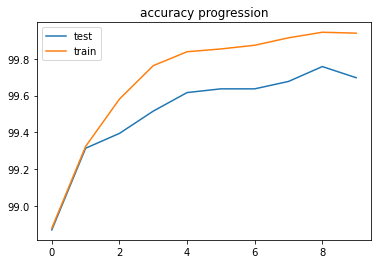

In [157]:
import collections
from time import time
import random
seed = settings['seed']
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False 
n_clients_selected = 5
test = 'bandits' #settings['type']
print(test)
p2p = P2P_AFPL(total_clients,train_data,train_partition2,val_partition,test_data,test_partition,n_clients_selected,test)
phis = p2p.loop(10,p2p,'mine') #settings['experiment_name'])

In [202]:
client = 1 
print(np.argwhere(adj_matrix[client]>0))
print(np.argwhere(p2p.phis[client]>0))
print(np.argwhere(p2p.selected_clients_arr[:,client,:]>0))

print(adj_matrix[client])
print(p2p.phis[client])
print(p2p.selected_clients_arr[:,client,:])

[]
[]
[]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [60]:
print(np.argwhere(adj_matrix[1,:]>0))
print(adj_matrix[1,:])

[[ 2]
 [ 5]
 [ 6]
 [11]
 [14]
 [32]
 [41]
 [42]
 [44]
 [45]
 [51]
 [54]
 [63]
 [66]
 [67]
 [72]
 [79]
 [86]
 [93]
 [97]
 [99]]
[0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1.]


In [63]:
def graph_from_adj(arr):
    G = nx.DiGraph()

    for i in range(len(arr)):
        for j in range(len(arr)):
            if arr[i,j] == 1: 
                G.add_edge(i,j)
    return G 

def load_phi(epoch,experiment_name):
    fname = os.path.join('checkpoints_bandits', experiment_name, 'phi'+str(epoch)+'.txt')
    phi = np.loadtxt(fname)
    return phi 

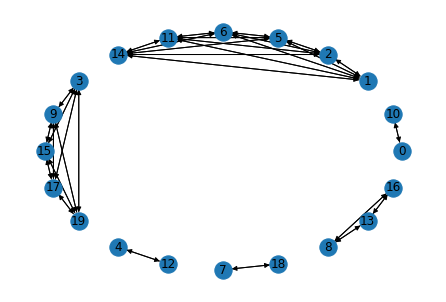

In [73]:
GT = graph_from_adj(adj_matrix)
position = nx.circular_layout(GT)
nx.draw(GT,pos=position,with_labels=True)

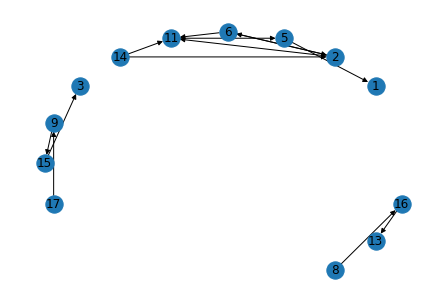

In [85]:
# analyze phis 
i =0
experiment_name = 'mine_2'
phi = load_phi(i,experiment_name)
G_init = graph_from_adj(phi)

nx.draw(G_init,pos=position,with_labels=True)

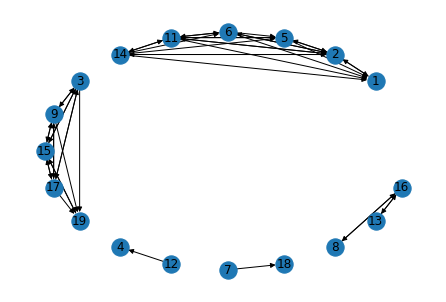

In [74]:
# analyze phis 
i = 0
experiment_name = 'mine_2'
phi = load_phi(i,experiment_name)
G_init = graph_from_adj(phi)

nx.draw(G_init,pos=position,with_labels=True)

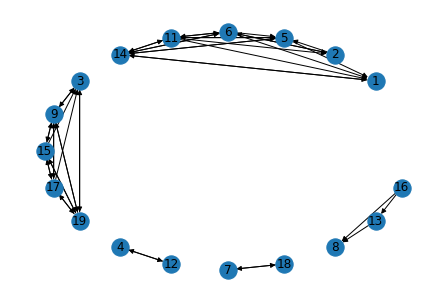

In [75]:
i = 1
fname = os.path.join('checkpoints_bandits', experiment_name, 'phi'+str(i)+'.txt')
phi = np.loadtxt(fname)
arr = np.array(phi>0,dtype='int')

previous_phi =np.loadtxt(os.path.join('checkpoints_bandits', experiment_name, 'phi'+str(i-1)+'.txt'))
change_phi = phi - previous_phi 
G_1 = graph_from_adj(change_phi)
nx.draw(G_1,pos=position,with_labels=True)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  9.  0.  0.  9.  8.  0.  0.  0.  0. 14.  0.  0. 15.  0.  0.  0.
   0.  0.]
 [ 0.  6.  0.  0.  0.  7. 12.  0.  0.  0.  0. 11.  0.  0.  2.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 21.  0.  0.  0.  0.  0.  4.  0. 18.
   0.  6.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 15.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0. 16.  7.  0.  0.  0. 13.  0.  0.  0.  0. 13.  0.  0. 16.  0.  0.  0.
   0.  0.]
 [ 0. 22. 18.  0.  0. 16.  0.  0.  0.  0.  0. 21.  0.  0. 12.  0.  0.  0.
   0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  19.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0. 18.  0.
   0.  0.]
 [ 0.  0.  0. 22.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 25.  0. 21.
   0. 23.]
 [ 6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0. 17. 15.  0.  0. 15. 15.  0.  0.  0.  0.  0.  0.  0. 19.  0.

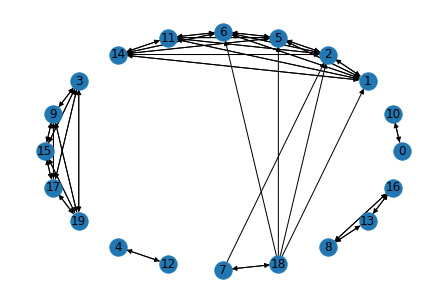

In [77]:
i = 24
fname = os.path.join('checkpoints_bandits', experiment_name, 'phi'+str(i)+'.txt')
phi = np.loadtxt(fname)
print(phi)
arr = np.array(phi>0,dtype='int')

G_1 = graph_from_adj(arr)
nx.draw(G_1,pos=position,with_labels=True)